In [23]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, confusion_matrix

In [8]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv('transformer_condition_dataset.csv')

# Separate features and label
features = df[['Temperature (°C)', 'Oil Level (%)', 'Current (A)', 'Voltage (V)', 'Vibration (m/s²)']]
labels = df['Condition']

In [9]:
scaler = MinMaxScaler()

# Fit and transform the features
normalized_features = scaler.fit_transform(features)

# Create a new DataFrame with normalized data
normalized_df = pd.DataFrame(normalized_features, columns=features.columns)
normalized_df['Condition'] = labels

In [10]:
normalized_df.to_csv('transformer_condition_dataset_normalized.csv', index=False)

# Display first few rows
print("First 5 rows of the normalized dataset:")
print(normalized_df.head())

First 5 rows of the normalized dataset:
   Temperature (°C)  Oil Level (%)  Current (A)  Voltage (V)  \
0          0.527778       0.899875     0.341429         0.43   
1          0.481111       0.849812     0.404286         0.40   
2          0.585556       0.450563     0.837143         0.88   
3          0.253333       0.919900     0.114286         0.50   
4          0.337778       0.688360     0.037143         0.59   

   Vibration (m/s²)  Condition  
0          0.034483          0  
1          0.310345          0  
2          0.413793          2  
3          0.172414          0  
4          0.310345          0  


In [24]:

# Load normalized data
df = pd.read_csv('transformer_condition_dataset_normalized.csv')
X = df.drop('Condition', axis=1)
y = pd.get_dummies(df['Condition'])  # One-hot encode labels


In [25]:

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build MLP
model = Sequential([
    Dense(64, activation='relu', input_shape=(5,)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Predict on test set
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)  # Convert probabilities to class labels
y_test_labels = np.argmax(y_test.values, axis=1)  # Convert one-hot to labels


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.5550 - loss: 0.9450 - val_accuracy: 0.8453 - val_loss: 0.5236
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8479 - loss: 0.4639 - val_accuracy: 0.8703 - val_loss: 0.3684
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8777 - loss: 0.3260 - val_accuracy: 0.8719 - val_loss: 0.3401
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8662 - loss: 0.3273 - val_accuracy: 0.8766 - val_loss: 0.3199
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8878 - loss: 0.2939 - val_accuracy: 0.8859 - val_loss: 0.3073
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8835 - loss: 0.2887 - val_accuracy: 0.8875 - val_loss: 0.2982
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8880 - loss: 0.2807 - val_accuracy: 0.8859 - val_loss: 0.3013
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8977 - loss: 0.2778 - val_accuracy: 0.8953 - val_loss

F1 Score (Weighted): 0.9618

Confusion Matrix:
[[408   1   0]
 [ 27 193   2]
 [  0   0 169]]


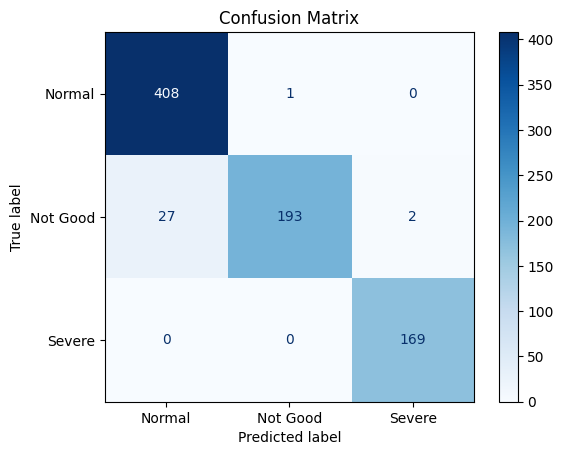

In [26]:

# Calculate F1 Score
f1 = f1_score(y_test_labels, y_pred, average='weighted')  # Weighted average for multi-class
print(f"F1 Score (Weighted): {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test_labels, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Not Good', 'Severe'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Fold 1: F1 Score = 0.9734, Accuracy = 0.9737


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Fold 2: F1 Score = 0.9519, Accuracy = 0.9525


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Fold 3: F1 Score = 0.9687, Accuracy = 0.9688


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Fold 4: F1 Score = 0.9659, Accuracy = 0.9663


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Fold 5: F1 Score = 0.9559, Accuracy = 0.9563

Average F1 Score (Cross-Validation): 0.9632 ± 0.0081
Average Accuracy (Cross-Validation): 0.9635 ± 0.0079


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Per-Class Metrics:
Normal: Precision = 0.9736, Recall = 0.9902, F1 = 0.9818
Not Good: Precision = 0.9813, Recall = 0.9459, F1 = 0.9633
Severe: Precision = 0.9941, Recall = 1.0000, F1 = 0.9971

ROC-AUC Score (One-vs-Rest): 0.9964


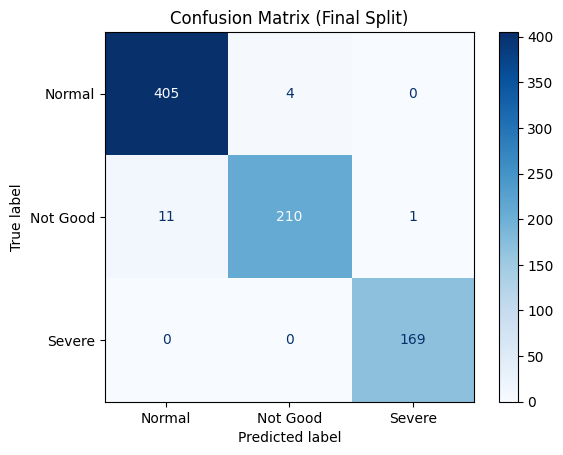

In [22]:

# Load normalized data
df = pd.read_csv('transformer_condition_dataset_normalized.csv')
X = df.drop('Condition', axis=1).values
y = pd.get_dummies(df['Condition']).values  # One-hot encoded

# Define MLP model function
def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(5,)),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# K-Fold Cross-Validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
f1_scores = []
accuracies = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Train model
    model = create_model()
    model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)

    # Predict
    y_pred_proba = model.predict(X_test)
    y_pred = np.argmax(y_pred_proba, axis=1)
    y_test_labels = np.argmax(y_test, axis=1)

    # Metrics
    f1 = f1_score(y_test_labels, y_pred, average='weighted')
    acc = model.evaluate(X_test, y_test, verbose=0)[1]
    f1_scores.append(f1)
    accuracies.append(acc)
    print(f"Fold {fold+1}: F1 Score = {f1:.4f}, Accuracy = {acc:.4f}")

# Average metrics
print(f"\nAverage F1 Score (Cross-Validation): {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")
print(f"Average Accuracy (Cross-Validation): {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")

# Final model on train-test split for detailed metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = create_model()
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Precision, Recall, F1 per Class
precision, recall, f1, _ = precision_recall_fscore_support(y_test_labels, y_pred, average=None)
classes = ['Normal', 'Not Good', 'Severe']
print("\nPer-Class Metrics:")
for i, cls in enumerate(classes):
    print(f"{cls}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1 = {f1[i]:.4f}")

# ROC-AUC (One-vs-Rest)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print(f"\nROC-AUC Score (One-vs-Rest): {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test_labels, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix (Final Split)')
plt.show()

In [28]:
model.save("mlp_model.keras")
